In [1]:
import numpy as np
from PIL import Image
import seaborn as sn
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
label_mapping =   {0: 0, #"void"
  1: 0, #"dirt"
  3: 1, #"grass"
  4: 2 ,#"tree"
  5: 3, #"pole"
  6: 4, #"water"
  7: 0, #"sky"
  8: 5, #"vehicle"
  9: 0, #"object"
  10: 0, #"asphalt"
  12: 0, #"building"
  15: 6, #"log"
  17: 7, #"person"
  18: 8, #"fence"
  19: 9, #"bush"
  23: 10, #"concrete"
  27: 11, #"barrier"
  31: 12, #"puddle"
  33: 13, #"mud"
  34: 14} #"rubble"}

In [3]:
classname_list = ["void", "grass", "tree", "pole", "water", "vehicle",
                  "log", "person", "fence", "bush", "concrete", "barrier", "puddle", "mud", "rubble"]

In [4]:
def get_confusion_matrix(label, pred, size, num_class, ignore=-1):
    """
    Calcute the confusion matrix by given label and pred
    """
    seg_pred = pred.flatten().astype('int32')
    seg_gt = label.flatten().astype('int32')
    ignore_index = seg_gt != ignore
    seg_gt = seg_gt[ignore_index]
    seg_pred = seg_pred[ignore_index]
    index = (seg_gt * num_class + seg_pred).astype('int32')
    label_count = np.bincount(index)
    confusion_matrix = np.zeros((num_class, num_class))
    for i_label in range(num_class):
        for i_pred in range(num_class):
            cur_index = i_label * num_class + i_pred
            if cur_index < len(label_count):
                confusion_matrix[i_label,
                                 i_pred] = label_count[cur_index]
    
    return confusion_matrix

In [5]:
def convert_label(label, label_mapping, inverse=False):
    temp = label.copy()
    if inverse:
        for v, k in label_mapping.items():
            label[temp == k] = v
    else:
        for k, v in label_mapping.items():
            label[temp == k] = v
    return label

In [6]:
def plot_confusion_matrix(cm, classname_list):
    cm_sum = cm.sum(axis=1)
    cm_sum[cm_sum == 0] = 0.1

    cmn = cm/cm_sum[:, np.newaxis]
    #cmn = cm
    df_cm = pd.DataFrame(cmn, index=classname_list,
                         columns=classname_list)
    fig = plt.figure(figsize=(20, 14))
    sn.heatmap(df_cm, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [7]:
root = "/home/usl/Datasets/"
list_path = "pt_test.lst"
num_class = 15
img_list = [line.strip().split()[1] for line in open(root+"/rellis/"+list_path)]
confusion_matrix = np.zeros((num_class,num_class)).astype(np.float64)
for index, img_path in enumerate(img_list[:]):
    label_path = os.path.join(root,"rellis",img_path)
    pred_path = os.path.join(root,"salsa",img_path)
    label = np.fromfile(label_path,dtype=np.int32)
    label = label.reshape((-1,))
    label = convert_label(label, label_mapping)
    label_shape = label.shape
    pred = np.fromfile(pred_path,dtype=np.int32)
    pred = pred.reshape((-1,))
    pred = convert_label(pred, label_mapping)
    confusion_matrix =confusion_matrix + get_confusion_matrix(label,pred,label.shape,num_class,0)
    if index % 100 == 0:
        print('processing: %d images' % index)
        pos = confusion_matrix.sum(1)
        res = confusion_matrix.sum(0)
        tp = np.diag(confusion_matrix)
        IoU_array = (tp / np.maximum(1.0, pos + res - tp))
        mean_IoU = IoU_array.mean()
        print('mIoU: %.4f' % (mean_IoU))    

processing: 0 images
mIoU: 0.1812
processing: 100 images
mIoU: 0.2537
processing: 200 images
mIoU: 0.2410
processing: 300 images
mIoU: 0.2618
processing: 400 images
mIoU: 0.2511
processing: 500 images
mIoU: 0.2622
processing: 600 images
mIoU: 0.2680
processing: 700 images
mIoU: 0.2644
processing: 800 images
mIoU: 0.2625
processing: 900 images
mIoU: 0.2615
processing: 1000 images
mIoU: 0.2572
processing: 1100 images
mIoU: 0.2543
processing: 1200 images
mIoU: 0.2534
processing: 1300 images
mIoU: 0.2646
processing: 1400 images
mIoU: 0.2787
processing: 1500 images
mIoU: 0.2732
processing: 1600 images
mIoU: 0.2765
processing: 1700 images
mIoU: 0.2945
processing: 1800 images
mIoU: 0.3199
processing: 1900 images
mIoU: 0.3170
processing: 2000 images
mIoU: 0.3212
processing: 2100 images
mIoU: 0.3239
processing: 2200 images
mIoU: 0.3250
processing: 2300 images
mIoU: 0.3649
processing: 2400 images
mIoU: 0.3799
processing: 2500 images
mIoU: 0.3843
processing: 2600 images
mIoU: 0.3867
processing: 2

 0.00 & 64.74 & 79.04 & 56.26 & 0.00 & 23.12 & 18.76 & 83.17 & 16.13 & 72.90 & 75.27 & 75.89 & 23.20 & 9.58 & 5.01 &[0.         0.64738218 0.79042349 0.56256161 0.         0.23123991
 0.18764614 0.83165025 0.16134766 0.72898169 0.7527398  0.75891187
 0.23196699 0.09577922 0.05010921] 0.4020493339200974


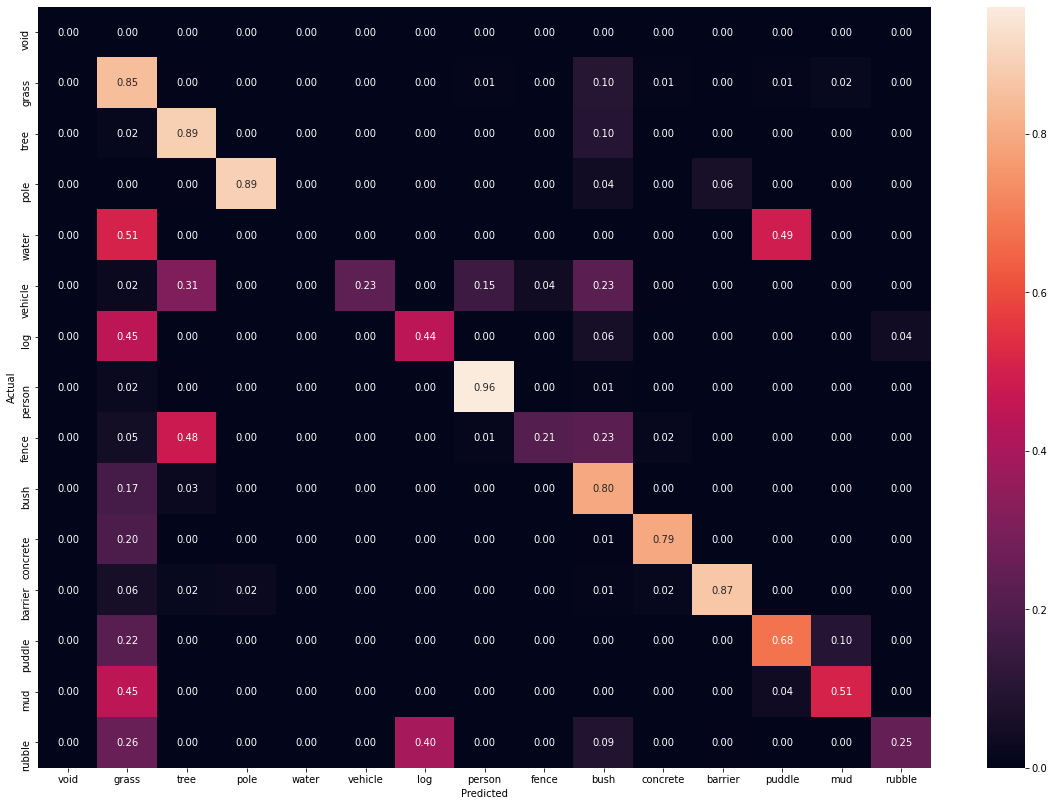

In [8]:
pos = confusion_matrix.sum(1)
res = confusion_matrix.sum(0)
tp = np.diag(confusion_matrix)
IoU_array = (tp / np.maximum(1.0, pos + res - tp))
mean_IoU = IoU_array.mean() 
for iou in IoU_array:
    iou = iou*100
    print(f" {iou:4.2f} &",end = '')
print(IoU_array,mean_IoU)
plot_confusion_matrix(confusion_matrix,classname_list)

In [10]:
root = "/home/usl/Datasets/"
list_path = "pt_test.lst"
num_class = 15
img_list = [line.strip().split()[1] for line in open(root+"/rellis/"+list_path)]
confusion_matrix = np.zeros((num_class,num_class)).astype(np.float64)
for index, img_path in enumerate(img_list[:]):
    label_path = os.path.join(root,"rellis",img_path)
    pred_path = os.path.join(root,"kpconv",img_path)
    label = np.fromfile(label_path,dtype=np.int32)
    label = label.reshape((-1,))
    label = convert_label(label, label_mapping)
    label_shape = label.shape
    pred = np.fromfile(pred_path,dtype=np.int32)
    pred = pred.reshape((-1,))
    pred = convert_label(pred, label_mapping)
    confusion_matrix =confusion_matrix + get_confusion_matrix(label,pred,label.shape,num_class,0)
    if index % 100 == 0:
        print('processing: %d images' % index)
        pos = confusion_matrix.sum(1)
        res = confusion_matrix.sum(0)
        tp = np.diag(confusion_matrix)
        IoU_array = (tp / np.maximum(1.0, pos + res - tp))
        mean_IoU = IoU_array.mean()
        print('mIoU: %.4f' % (mean_IoU))    

processing: 0 images
mIoU: 0.0535
processing: 100 images
mIoU: 0.1908
processing: 200 images
mIoU: 0.1947
processing: 300 images
mIoU: 0.1985
processing: 400 images
mIoU: 0.1903
processing: 500 images
mIoU: 0.1899
processing: 600 images
mIoU: 0.1897
processing: 700 images
mIoU: 0.1834
processing: 800 images
mIoU: 0.1784
processing: 900 images
mIoU: 0.1790
processing: 1000 images
mIoU: 0.1771
processing: 1100 images
mIoU: 0.1738
processing: 1200 images
mIoU: 0.1714
processing: 1300 images
mIoU: 0.1701
processing: 1400 images
mIoU: 0.1696
processing: 1500 images
mIoU: 0.1712
processing: 1600 images
mIoU: 0.1721
processing: 1700 images
mIoU: 0.1725
processing: 1800 images
mIoU: 0.1738
processing: 1900 images
mIoU: 0.1764
processing: 2000 images
mIoU: 0.1779
processing: 2100 images
mIoU: 0.1802
processing: 2200 images
mIoU: 0.1812
processing: 2300 images
mIoU: 0.1804
processing: 2400 images
mIoU: 0.1796
processing: 2500 images
mIoU: 0.1786
processing: 2600 images
mIoU: 0.1789
processing: 2

 0.00 & 56.41 & 49.25 & 0.00 & 0.00 & 0.00 & 0.00 & 81.20 & 0.40 & 58.45 & 33.91 & 0.00 & 0.00 & 0.00 & 0.00 &[0.         0.56406441 0.49251261 0.         0.         0.
 0.         0.81196698 0.00403    0.58450725 0.33911498 0.
 0.         0.         0.        ] 0.18641308214126426


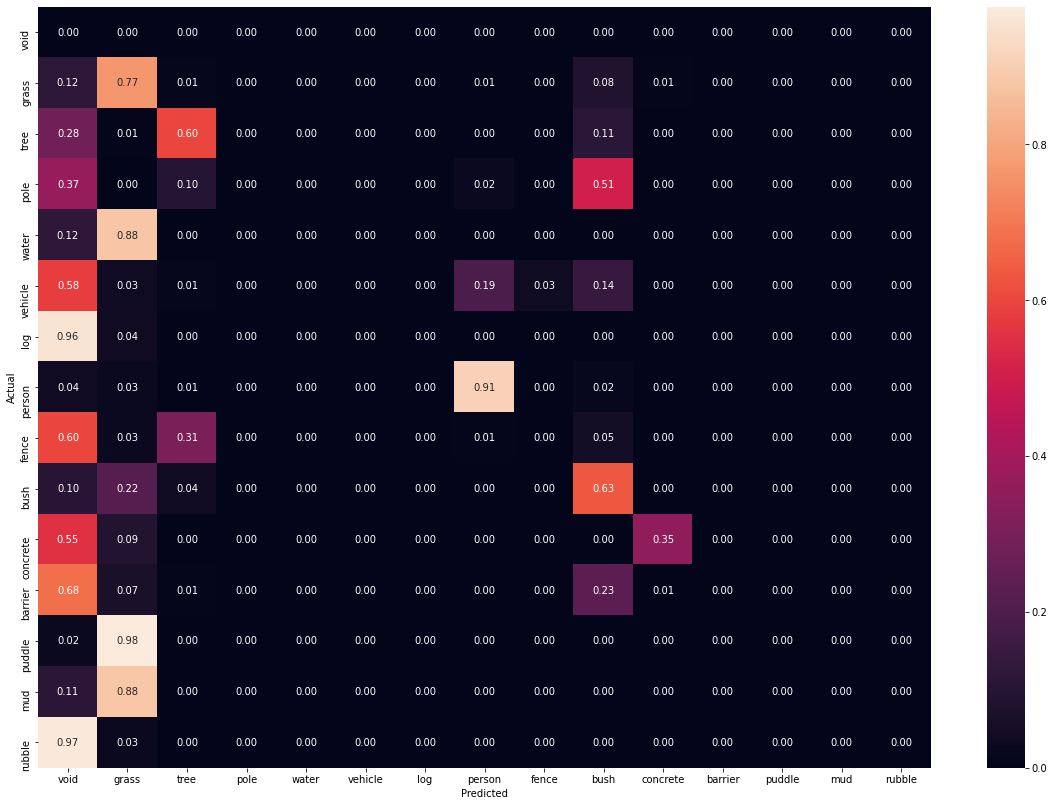

In [11]:
pos = confusion_matrix.sum(1)
res = confusion_matrix.sum(0)
tp = np.diag(confusion_matrix)
IoU_array = (tp / np.maximum(1.0, pos + res - tp))
mean_IoU = IoU_array.mean()  
for iou in IoU_array:
    iou = iou*100
    print(f" {iou:4.2f} &",end = '')
print(IoU_array,mean_IoU)
plot_confusion_matrix(confusion_matrix,classname_list)